# ✈️ Airline Ticket Pricing Analysis

# Explore the comprehensive dashboard and download the full analytical report detailing insights derived from the airline ticket pricing dataset.


# The Flights Dataset
***
Here,
The Flights Booking Dataset of various Airlines is a scraped datewise from a famous website in a structured format. The dataset contains the records of flight travel details between the cities in India. Here, multiple features are present like Source & Destination City, Arrival & Departure Time, Duration & Price of the flight etc.


This data is available as a CSV file. We are going to analyze this data set using the Pandas DataFrame.

This analyse will be helpful for those working in Airlines, Travel domain.

-----------

In [1]:
# import the required Python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import the Flights dataset

data = pd.read_csv(r"C:\Users\dell\Downloads\Airline Ticket Pricing Analysis\airlines_flights_data.csv")

In [3]:
data

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


**FEATURES**
The various features of the cleaned dataset are explained below:

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

### Cleaning the data

In [4]:
# Remove the 'index' column

data.drop( columns = 'index', inplace = True)

In [5]:
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [6]:
# Get some Info about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
# Get Statistical summary about the dataset

data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
data[ data['duration'] == 49.830000 ]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538


In [9]:
data[ data['duration'] == 0.830000 ]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
115869,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,6,3498
115943,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,7,3498
116010,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,8,3498
116081,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,9,3498
116163,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,10,3498
116236,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,11,3498
116322,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,12,3498
116411,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,13,3498
116496,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,14,3498
116656,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,16,1924


In [10]:
data [ data['price'] == 123071.000000 ]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
261377,Vistara,UK-772,Kolkata,Morning,one,Night,Delhi,Business,13.5,3,123071


In [11]:
data [ data['price'] == 1105.000000 ]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
203807,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,16,1105
203808,GO_FIRST,G8-505,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,16,1105
203908,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,17,1105
203909,GO_FIRST,G8-505,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,17,1105
204003,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,18,1105
...,...,...,...,...,...,...,...,...,...,...,...
206601,Indigo,6E-7261,Chennai,Morning,one,Evening,Hyderabad,Economy,7.92,49,1105
206602,Indigo,6E-611,Chennai,Evening,one,Late_Night,Hyderabad,Economy,8.25,49,1105
206603,Indigo,6E-581,Chennai,Morning,one,Evening,Hyderabad,Economy,9.17,49,1105
206604,Indigo,6E-7127,Chennai,Afternoon,one,Night,Hyderabad,Economy,9.50,49,1105


In [12]:
data.isnull().sum()            # check for the missing values in any column

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## Q.1. `What are the airlines in the dataset, accompanied by their frequencies?`

In [13]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [14]:
# Checking how many Airlines are in the dataset

data['airline'].nunique()

6

In [15]:
# Showing the names of the Airlines in the dataset

data['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [16]:
# Showing all the Airlines with their frequencies

data['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

C:\Users\dell\AppData\Local\Temp\ipykernel_12440\4080090352.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


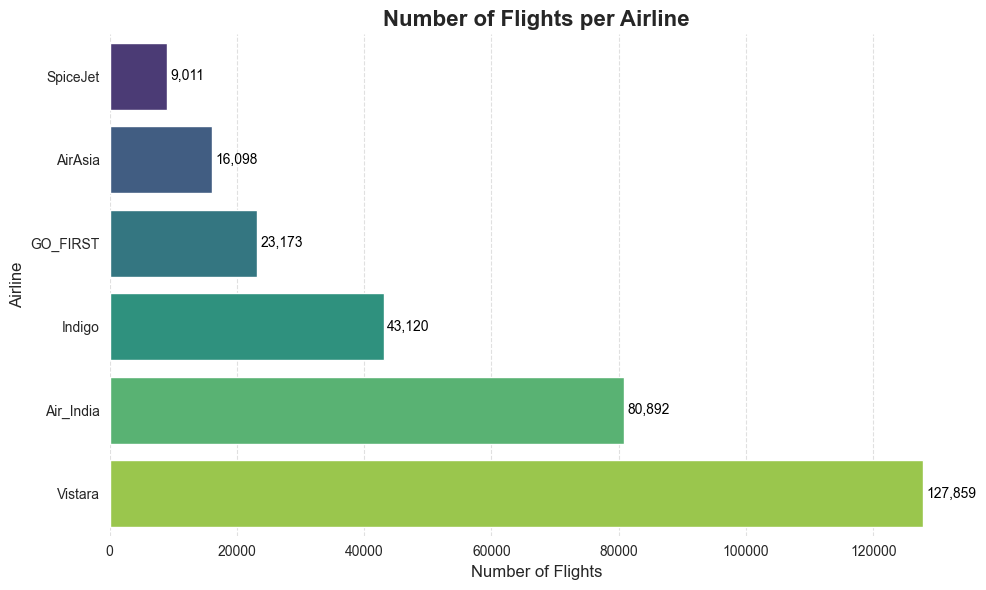

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
airline_counts = data['airline'].value_counts(ascending=True)

# Set modern style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create barplot with improved colors
barplot = sns.barplot(
    x=airline_counts.values,
    y=airline_counts.index,
    palette="viridis"
)

# Add data labels
for i, value in enumerate(airline_counts.values):
    plt.text(
        value + 500,   # position slightly right of the bar
        i,
        f"{value:,}",  # formatted with commas
        va='center',
        fontsize=10,
        color='black'
    )

# Add titles and labels with better formatting
plt.title("Number of Flights per Airline", fontsize=16, fontweight='bold')
plt.xlabel("Number of Flights", fontsize=12)
plt.ylabel("Airline", fontsize=12)

# Add subtle gridlines only on x-axis
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Remove spines for cleaner look
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


## Q.2. `Show Bar Graphs representing the Departure Time & Arrival Time`

In [18]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [19]:
# Showing the Departure Time for the flights

data['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [20]:
# Showing the Arrival Time for the flights

data['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

C:\Users\dell\AppData\Local\Temp\ipykernel_12440\3276207534.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\dell\AppData\Local\Temp\ipykernel_12440\3276207534.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


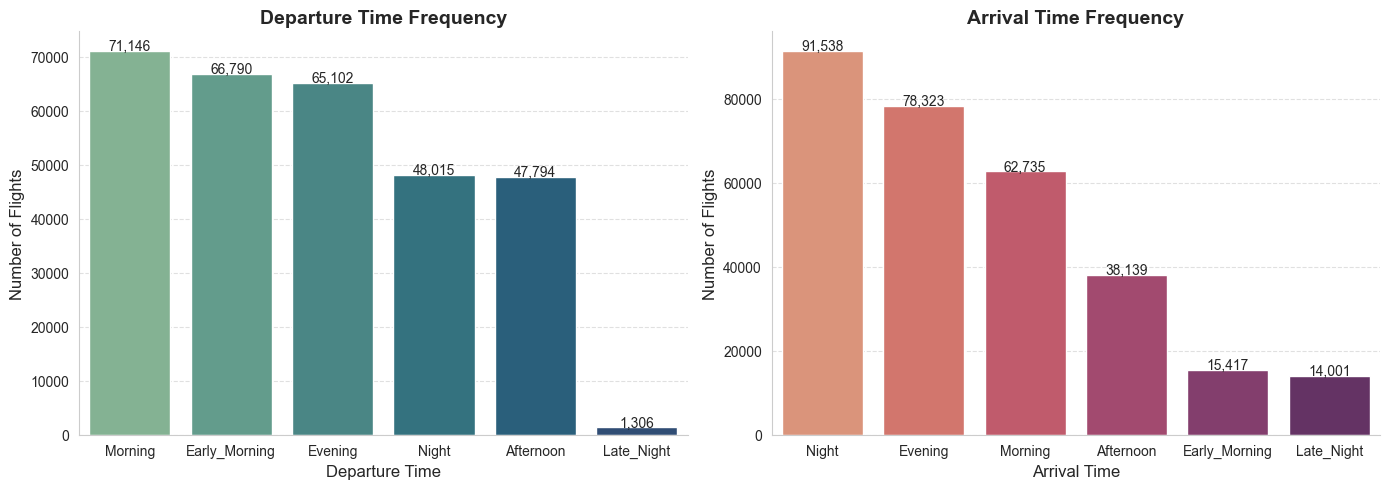

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
dep_counts = data['departure_time'].value_counts()
arr_counts = data['arrival_time'].value_counts()

# Set modern style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 5))

# --- Departure Time ---
plt.subplot(1, 2, 1)
sns.barplot(
    x=dep_counts.index,
    y=dep_counts.values,
    palette="crest"
)

# Add data labels
for i, value in enumerate(dep_counts.values):
    plt.text(i, value + 200, f"{value:,}", ha='center', fontsize=10)

plt.title("Departure Time Frequency", fontsize=14, fontweight='bold')
plt.xlabel("Departure Time", fontsize=12)
plt.ylabel("Number of Flights", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()

# --- Arrival Time ---
plt.subplot(1, 2, 2)
sns.barplot(
    x=arr_counts.index,
    y=arr_counts.values,
    palette="flare"
)

# Add data labels
for i, value in enumerate(arr_counts.values):
    plt.text(i, value + 200, f"{value:,}", ha='center', fontsize=10)

plt.title("Arrival Time Frequency", fontsize=14, fontweight='bold')
plt.xlabel("Arrival Time", fontsize=12)
plt.ylabel("Number of Flights", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()

plt.tight_layout()
plt.show()


## Q.3. `Show Bar Graphs representing the Source City & Destination City`

In [22]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [23]:
# Showing the Source City of the flights

data['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [24]:
# Showing the Destination City of the flights

data['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

C:\Users\dell\AppData\Local\Temp\ipykernel_12440\1457752060.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\dell\AppData\Local\Temp\ipykernel_12440\1457752060.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


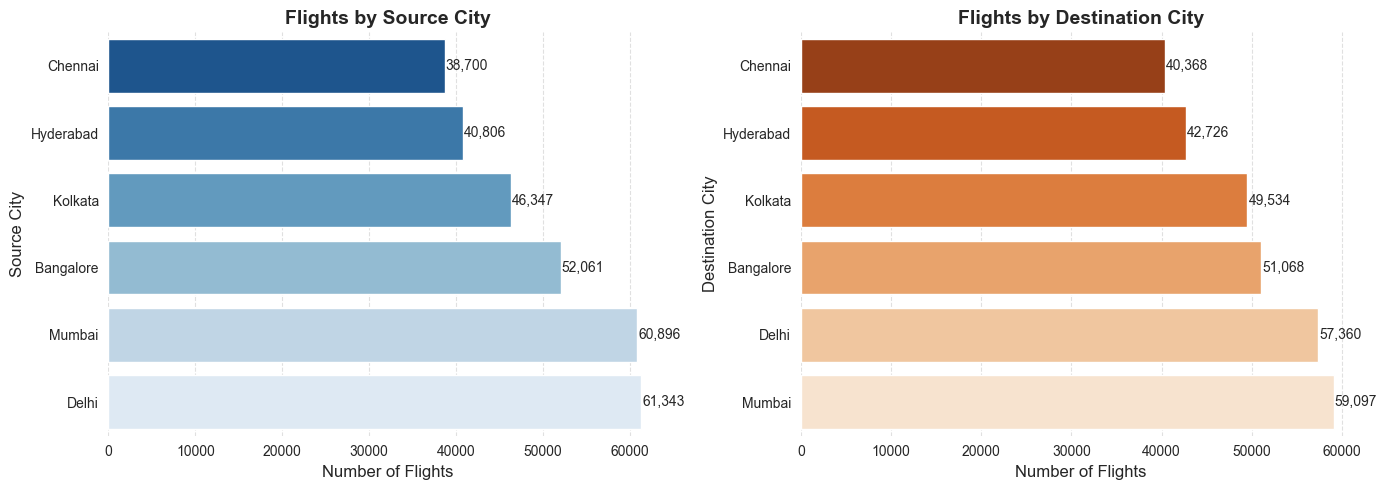

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
source_counts = data['source_city'].value_counts(ascending=True)
dest_counts = data['destination_city'].value_counts(ascending=True)

# Set modern style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 5))

# --- Source Cities ---
plt.subplot(1, 2, 1)
sns.barplot(
    x=source_counts.values,
    y=source_counts.index,
    palette="Blues_r"
)

# Add data labels
for i, value in enumerate(source_counts.values):
    plt.text(value + 100, i, f"{value:,}", va='center', fontsize=10)

plt.title("Flights by Source City", fontsize=14, fontweight='bold')
plt.xlabel("Number of Flights", fontsize=12)
plt.ylabel("Source City", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
sns.despine(left=True, bottom=True)

# --- Destination Cities ---
plt.subplot(1, 2, 2)
sns.barplot(
    x=dest_counts.values,
    y=dest_counts.index,
    palette="Oranges_r"
)

# Add data labels
for i, value in enumerate(dest_counts.values):
    plt.text(value + 100, i, f"{value:,}", va='center', fontsize=10)

plt.title("Flights by Destination City", fontsize=14, fontweight='bold')
plt.xlabel("Number of Flights", fontsize=12)
plt.ylabel("Destination City", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


## Q.4. `Does price varies with airlines ?`

In [26]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [27]:
# Grouping the airlines and checking their mean price

data.groupby('airline')['price'].mean()

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64

C:\Users\dell\AppData\Local\Temp\ipykernel_12440\2497786718.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


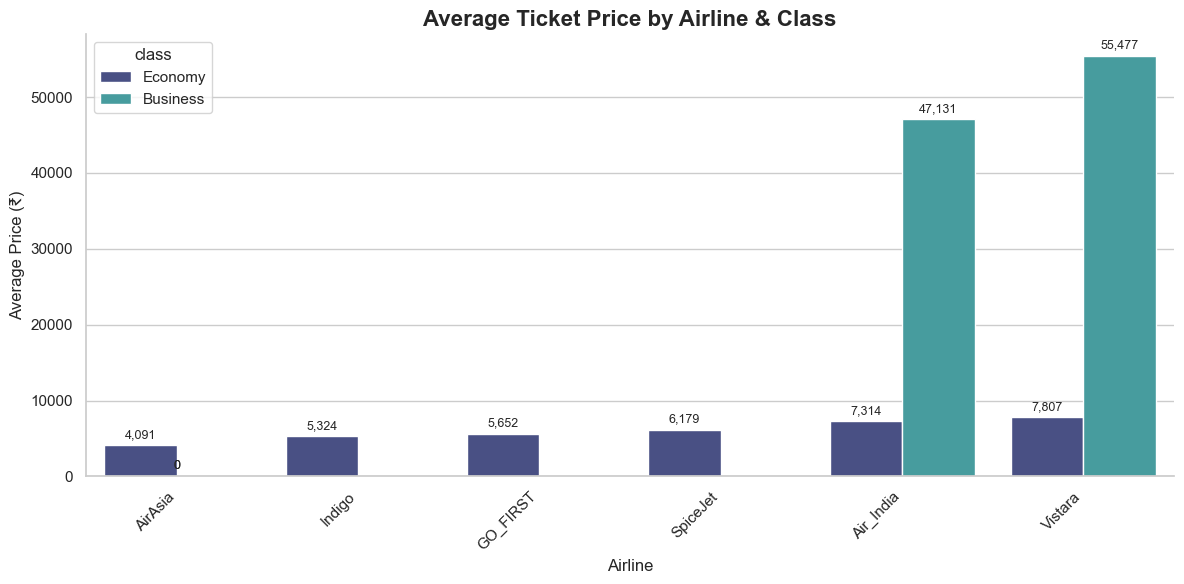

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean prices for sorting
mean_prices = data.groupby('airline')['price'].mean().sort_values()
sorted_airlines = mean_prices.index

# Set style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create barplot
barplot = sns.barplot(
    x='airline',
    y='price',
    hue='class',
    data=data,
    order=sorted_airlines,  # sort by mean price
    palette='mako',
    ci=None
)

# Add data labels
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(
        f"{height:,.0f}",  # formatted as integer
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        fontsize=9,
        xytext=(0, 3),
        textcoords='offset points'
    )

# Customize
plt.title("Average Ticket Price by Airline & Class", fontsize=16, fontweight='bold')
plt.xlabel("Airline", fontsize=12)
plt.ylabel("Average Price (₹)", fontsize=12)
plt.xticks(rotation=45, ha='right')

sns.despine()
plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_12440\1826375451.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


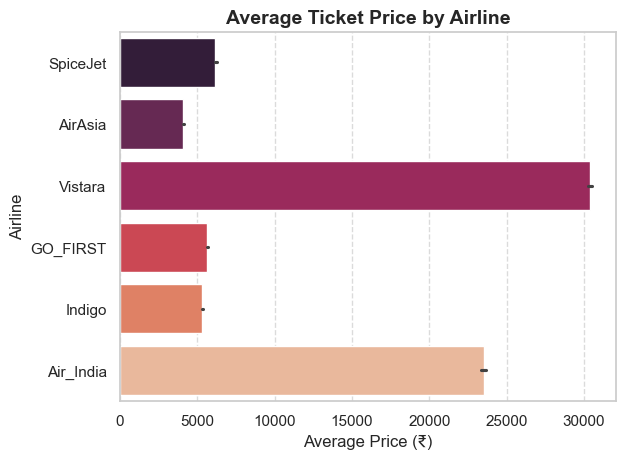

In [29]:
sns.barplot(
    x='price',
    y='airline',
    data=data,
    estimator=np.mean,
    palette='rocket'
)
plt.title("Average Ticket Price by Airline", fontsize=14, fontweight='bold')
plt.xlabel("Average Price (₹)")
plt.ylabel("Airline")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## Q.5. `Does ticket price change based on the departure time and arrival time?`

In [30]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [31]:
# Checking the Mean Ticket Price based on the Departure Times

data.groupby('departure_time')['price'].mean()

departure_time
Afternoon        18179.203331
Early_Morning    20370.676718
Evening          21232.361894
Late_Night        9295.299387
Morning          21630.760254
Night            23062.146808
Name: price, dtype: float64

In [32]:
# Checking the Mean Ticket Price based on the Arrival Times

data.groupby('arrival_time')['price'].mean()

arrival_time
Afternoon        18494.598993
Early_Morning    14993.139521
Evening          23044.371615
Late_Night       11284.906078
Morning          22231.076098
Night            21586.758341
Name: price, dtype: float64

C:\Users\dell\AppData\Local\Temp\ipykernel_12440\3101580010.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


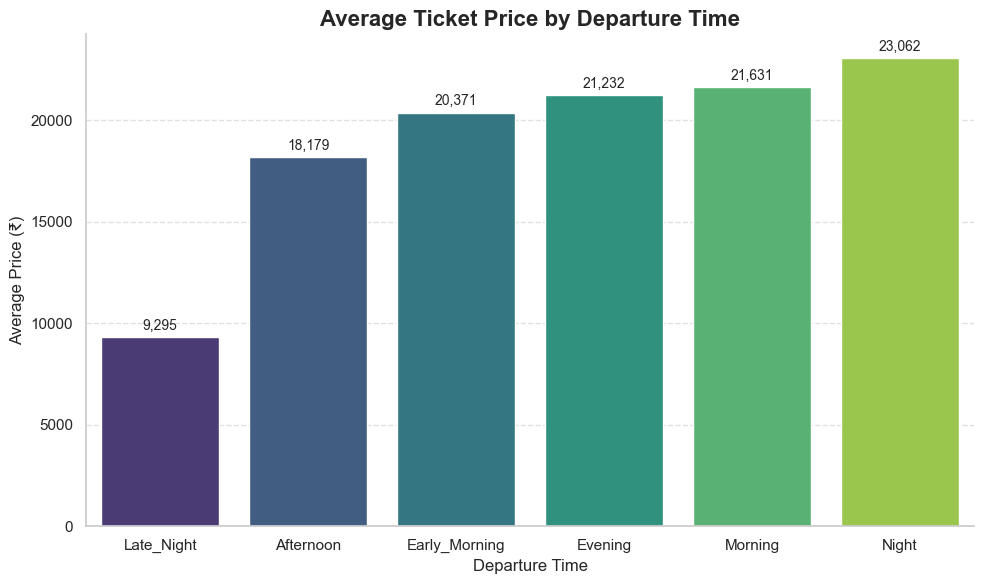

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean prices for sorting
mean_prices = data.groupby('departure_time')['price'].mean().sort_values()
sorted_times = mean_prices.index

# Set style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create barplot
barplot = sns.barplot(
    x='departure_time',
    y='price',
    data=data,
    order=sorted_times,
    palette='viridis',
    hue=None,          # avoids the new hue warning
    errorbar=None      # replaces ci=None
)

# Add data labels
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(
        f"{height:,.0f}",
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        fontsize=10,
        xytext=(0, 3),
        textcoords='offset points'
    )

# Customize chart
plt.title("Average Ticket Price by Departure Time", fontsize=16, fontweight='bold')
plt.xlabel("Departure Time", fontsize=12)
plt.ylabel("Average Price (₹)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()

plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_12440\4268732288.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


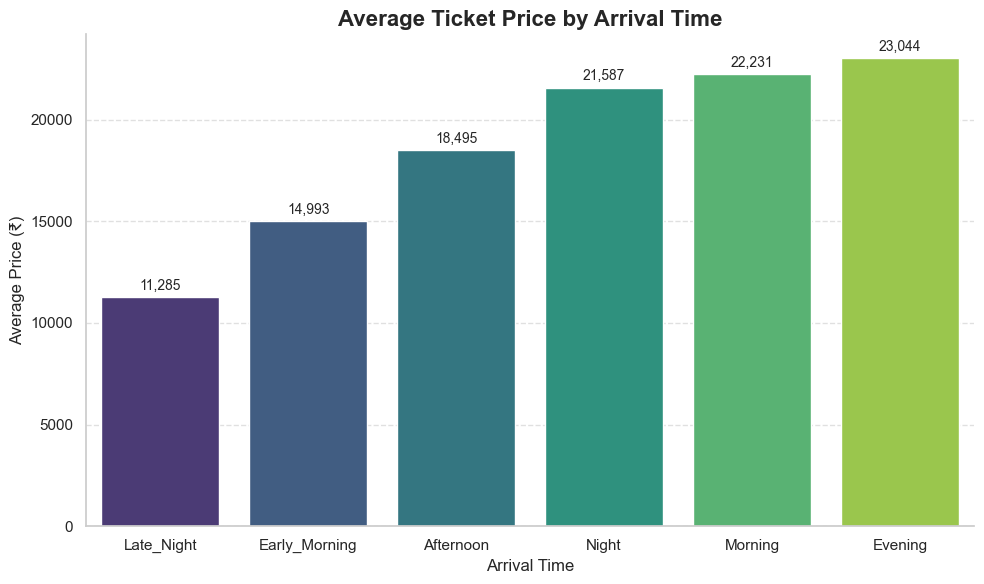

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean prices for sorting
mean_prices = data.groupby('arrival_time')['price'].mean().sort_values()
sorted_times = mean_prices.index

# Set style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create barplot
barplot = sns.barplot(
    x='arrival_time',
    y='price',
    data=data,
    order=sorted_times,
    palette='viridis',
    hue=None,          # avoids the new hue warning
    errorbar=None      # replaces ci=None
)

# Add data labels
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(
        f"{height:,.0f}",
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        fontsize=10,
        xytext=(0, 3),
        textcoords='offset points'
    )

# Customize chart
plt.title("Average Ticket Price by Arrival Time", fontsize=16, fontweight='bold')
plt.xlabel("Arrival Time", fontsize=12)
plt.ylabel("Average Price (₹)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()

plt.tight_layout()
plt.show()


In [ ]:
sns.relplot( x = 'arrival_time', y = 'price', data = data, col = 'departure_time', kind = 'line')

plt.show()

## Q.6. `How the price changes with change in Source and Destination?`

In [ ]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
# Checking the Mean Ticket Price for each Source City

data.groupby('source_city')['price'].mean()

source_city
Bangalore    21469.460575
Chennai      21995.339871
Delhi        18951.326639
Hyderabad    20155.623879
Kolkata      21746.235679
Mumbai       21483.818839
Name: price, dtype: float64

In [ ]:
# Checking the Mean Ticket Price for each Destination City

data.groupby('destination_city')['price'].mean()

destination_city
Bangalore    21593.955784
Chennai      21953.323969
Delhi        18436.767870
Hyderabad    20427.661284
Kolkata      21959.557556
Mumbai       21372.529469
Name: price, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

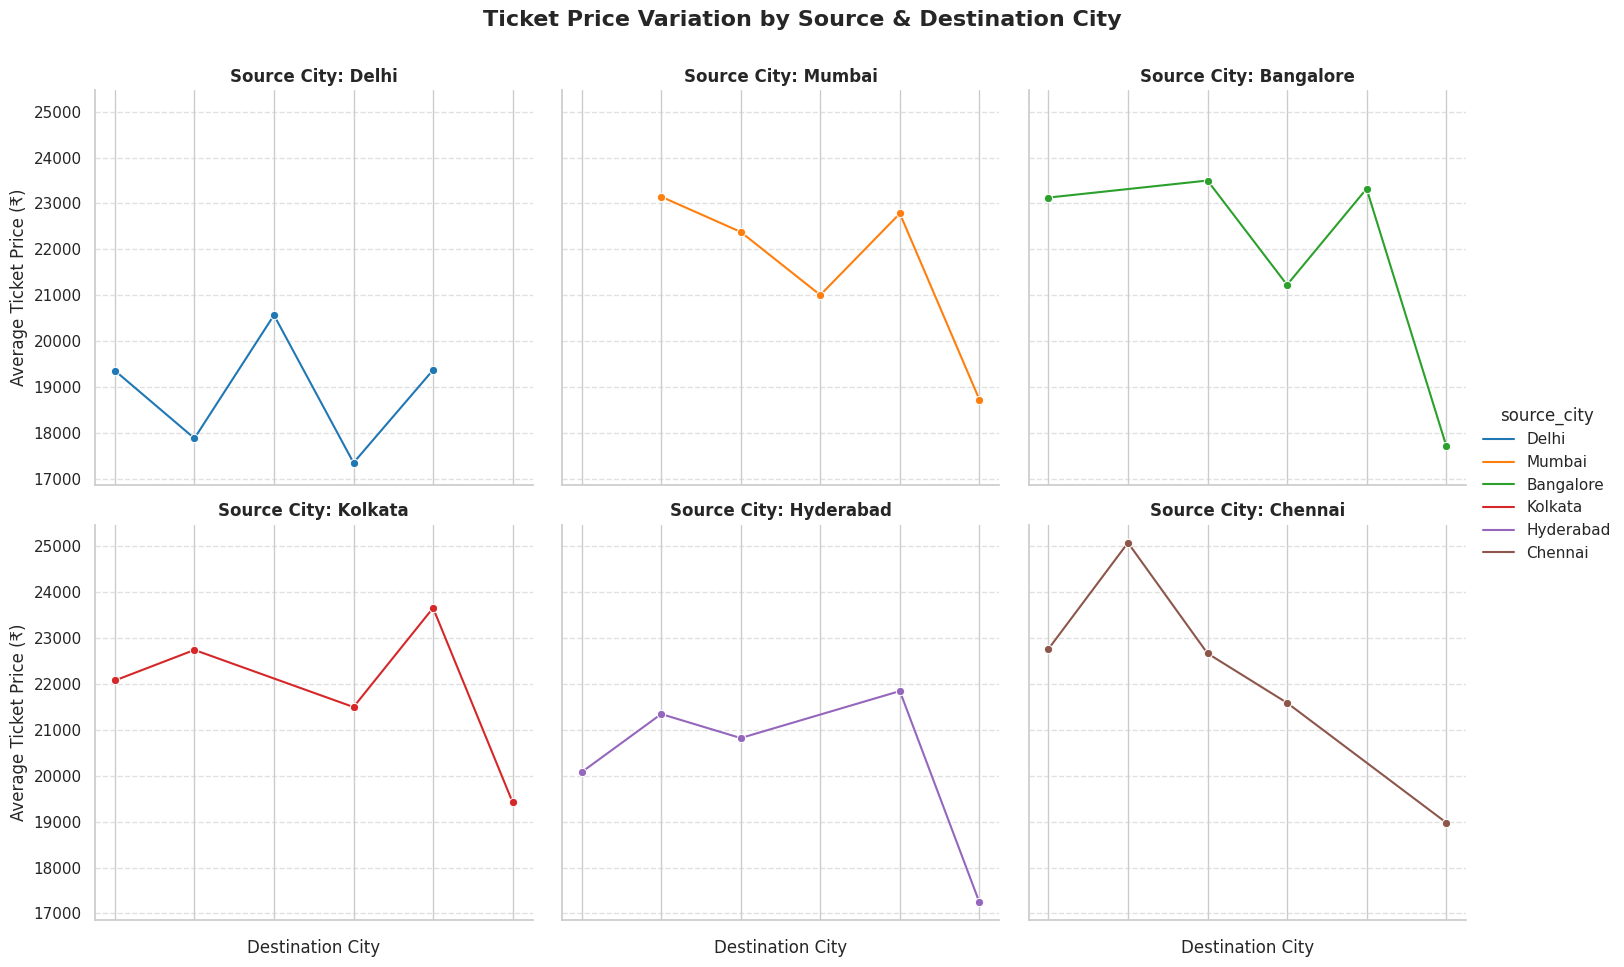

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set theme
sns.set_theme(style="whitegrid")

# Sort cities for consistent plotting
sorted_destinations = data.groupby('destination_city')['price'].mean().sort_values().index
sorted_sources = data['source_city'].unique()

# Create the plot
g = sns.relplot(
    x='destination_city',
    y='price',
    data=data,
    col='source_city',
    col_wrap=3,               # wrap facets for better viewing
    kind='line',
    hue='source_city',        # color lines differently
    palette='tab10',
    marker='o',               # add data points on lines
    facet_kws={'sharey': True, 'sharex': True},
    errorbar=None
)

# Customize each subplot
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.6)

# Set common labels and title
g.set_titles(col_template="Source City: {col_name}", fontsize=12, fontweight='bold')
g.set_axis_labels("Destination City", "Average Ticket Price (₹)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Ticket Price Variation by Source & Destination City", fontsize=16, fontweight='bold')

plt.show()


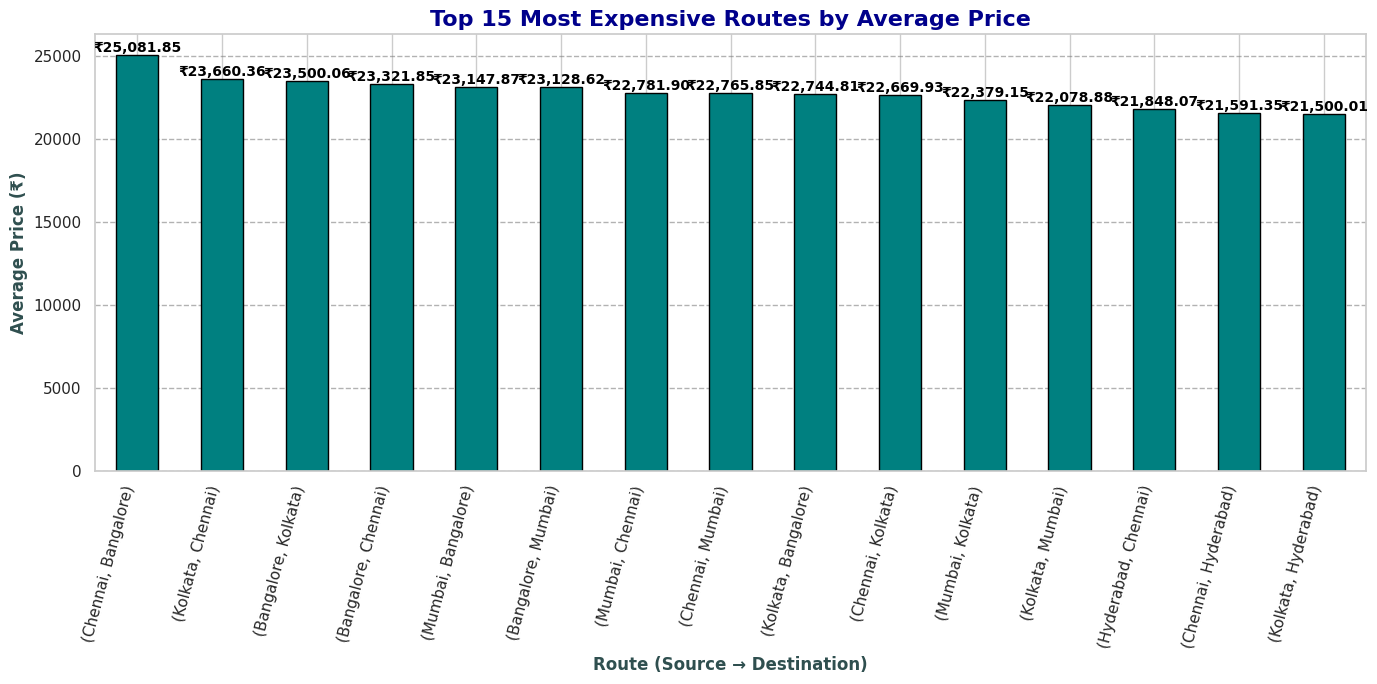

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average price by route (source to destination)
route_price = data.groupby(['source_city', 'destination_city'])['price'].mean().sort_values(ascending=False).head(15)

# Set the figure size
plt.figure(figsize=(14,7))

# Plot the bar chart
route_price.plot(kind='bar', color='teal', edgecolor='black')

# Adding title with better formatting
plt.title("Top 15 Most Expensive Routes by Average Price", fontsize=16, fontweight='bold', color='darkblue')

# Adding axis labels with increased font size
plt.xlabel("Route (Source → Destination)", fontsize=12, fontweight='bold', color='darkslategray')
plt.ylabel("Average Price (₹)", fontsize=12, fontweight='bold', color='darkslategray')

# Adding data labels above each bar for clarity
for i, value in enumerate(route_price.values):
    plt.text(i, value + 0.05, f'₹{value:,.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Rotate x-axis labels to make them more readable, and use a larger font
plt.xticks(rotation=75, ha='right', fontsize=11)

# Use a background theme for the plot
sns.set_theme(style="whitegrid", palette="muted")

# Adding gridlines to only the y-axis with customized style
plt.grid(axis='y', linestyle='--', alpha=0.6, color='gray')

# Ensure everything fits properly in the layout
plt.tight_layout()

# Show the plot
plt.show()


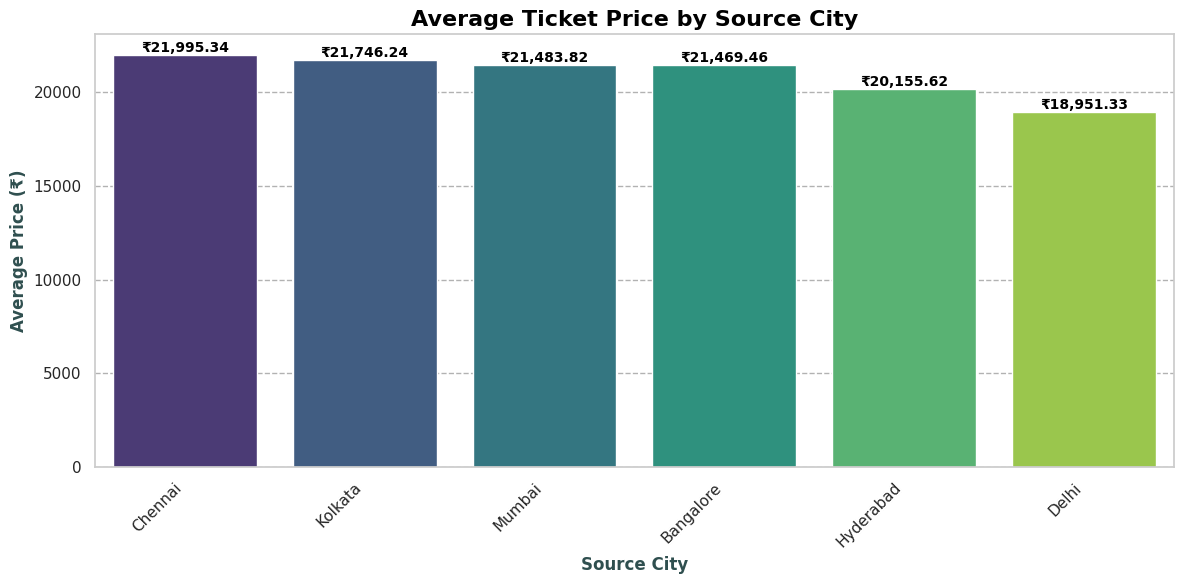

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average price by source city
source_price = data.groupby('source_city')['price'].mean().sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(12,6))

# Use seaborn to create a bar plot with a color palette
sns.barplot(x=source_price.index, y=source_price.values, palette='viridis')

# Adding title with better formatting
plt.title("Average Ticket Price by Source City", fontsize=16, fontweight='bold', color='black')

# Adding axis labels with increased font size
plt.xlabel("Source City", fontsize=12, fontweight='bold', color='darkslategray')
plt.ylabel("Average Price (₹)", fontsize=12, fontweight='bold', color='darkslategray')

# Adding gridlines to only the y-axis with customized style
plt.grid(axis='y', linestyle='--', alpha=0.6, color='gray')

# Adding data labels above each bar for clarity
for i, value in enumerate(source_price.values):
    plt.text(i, value + 0.05, f'₹{value:,.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Rotate x-axis labels to make them more readable
plt.xticks(rotation=45, ha='right', fontsize=11)

# Use a background theme for the plot
sns.set_theme(style="whitegrid", palette="muted")

# Show the plot
plt.tight_layout()  # To ensure everything fits nicely in the figure
plt.show()


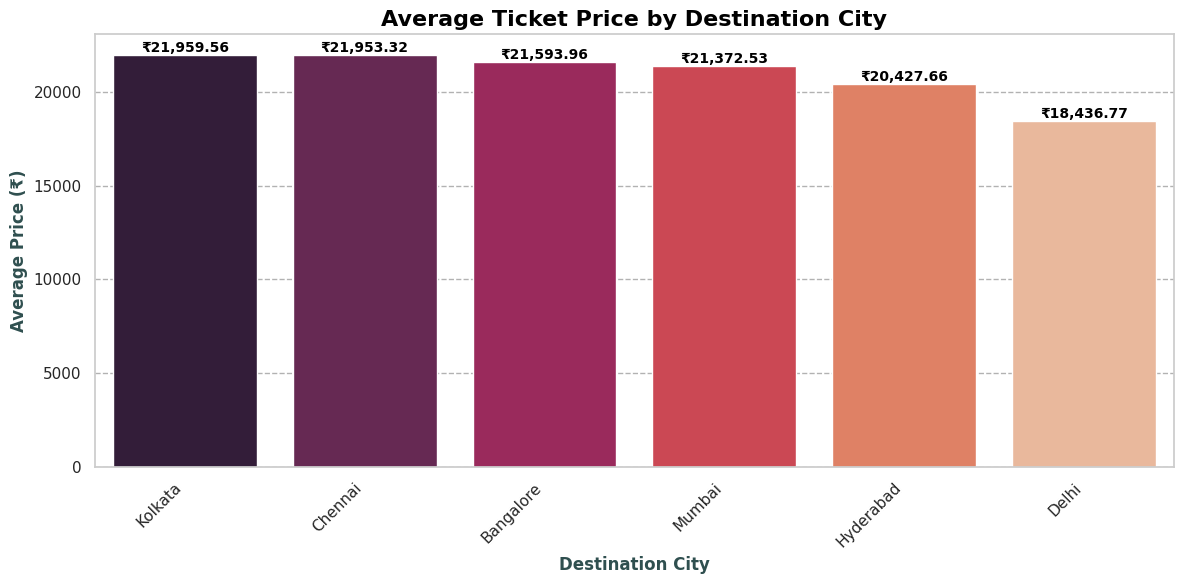

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average price by destination city
dest_price = data.groupby('destination_city')['price'].mean().sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(12,6))

# Use seaborn to create a bar plot with a color palette
sns.barplot(x=dest_price.index, y=dest_price.values, palette='rocket')

# Adding title with better formatting
plt.title("Average Ticket Price by Destination City", fontsize=16, fontweight='bold', color='black')

# Adding axis labels with increased font size
plt.xlabel("Destination City", fontsize=12, fontweight='bold', color='darkslategray')
plt.ylabel("Average Price (₹)", fontsize=12, fontweight='bold', color='darkslategray')

# Adding gridlines to only the y-axis with customized style
plt.grid(axis='y', linestyle='--', alpha=0.6, color='gray')

# Adding data labels above each bar for clarity
for i, value in enumerate(dest_price.values):
    plt.text(i, value + 0.05, f'₹{value:,.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Rotate x-axis labels to make them more readable
plt.xticks(rotation=45, ha='right', fontsize=11)

# Use a background theme for the plot
sns.set_theme(style="whitegrid", palette="muted")

# Show the plot
plt.tight_layout()  # To ensure everything fits nicely in the figure
plt.show()


### Q.7. `How is the price affected when tickets are bought in just 1 or 2 days before departure?`

In [ ]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
data['days_left'].nunique()

49

In [ ]:
data['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [ ]:
# Checking the Mean Ticket Price for different days_left

data.groupby('days_left')['price'].mean()

days_left
1     21591.867151
2     30211.299801
3     28976.083569
4     25730.905653
5     26679.773368
6     24856.493902
7     25588.367351
8     24895.883995
9     25726.246072
10    25572.819134
11    22990.656070
12    22505.803322
13    22498.885384
14    22678.002363
15    21952.540852
16    20503.546237
17    20386.353949
18    19987.445168
19    19507.677375
20    19699.983390
21    19430.494058
22    19590.667385
23    19840.913451
24    19803.908896
25    19571.641791
26    19238.290278
27    19950.866195
28    19534.986047
29    19744.653119
30    19567.580834
31    19392.706612
32    19258.135308
33    19306.271739
34    19562.008266
35    19255.652996
36    19517.688444
37    19506.306516
38    19734.912316
39    19262.095556
40    19144.972439
41    19347.440460
42    19154.261659
43    19340.528894
44    19049.080174
45    19199.876307
46    19305.351623
47    18553.272038
48    18998.126851
49    18992.971888
Name: price, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


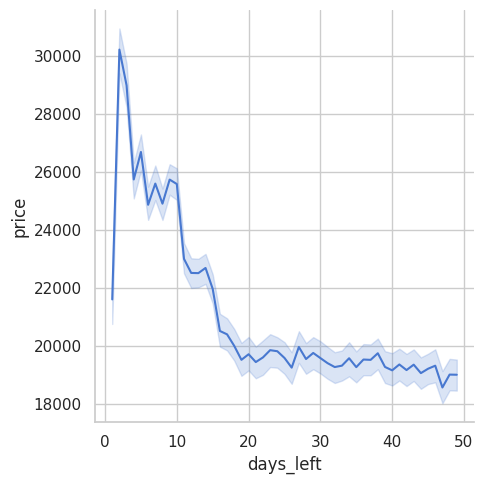

In [ ]:
sns.relplot( y='price', x = 'days_left', kind = 'line', data = data )

plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


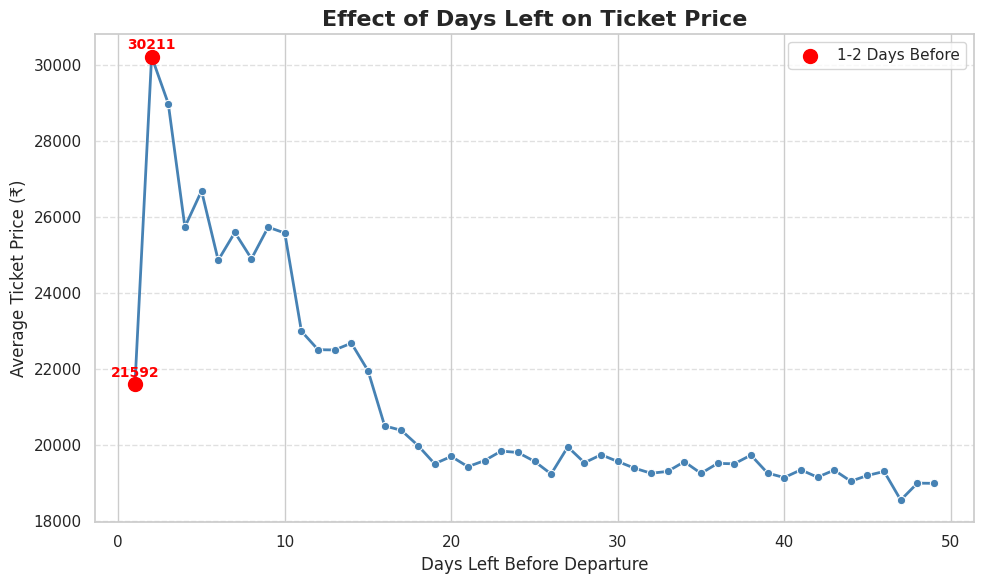

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort and compute mean prices
days_price = data.groupby('days_left')['price'].mean().reset_index().sort_values('days_left')

# Set theme
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot main line
sns.lineplot(
    data=days_price,
    x='days_left',
    y='price',
    marker='o',
    color='steelblue',
    linewidth=2
)

# Highlight points for 1 and 2 days left
highlight = days_price[days_price['days_left'].isin([1, 2])]
plt.scatter(
    highlight['days_left'],
    highlight['price'],
    color='red',
    s=100,
    zorder=5,
    label="1-2 Days Before"
)

# Annotate highlighted points
for _, row in highlight.iterrows():
    plt.text(
        row['days_left'],
        row['price'] + 200,
        f"{row['price']:.0f}",
        ha='center',
        fontsize=10,
        fontweight='bold',
        color='red'
    )

# Customize chart
plt.title("Effect of Days Left on Ticket Price", fontsize=16, fontweight='bold')
plt.xlabel("Days Left Before Departure", fontsize=12)
plt.ylabel("Average Ticket Price (₹)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


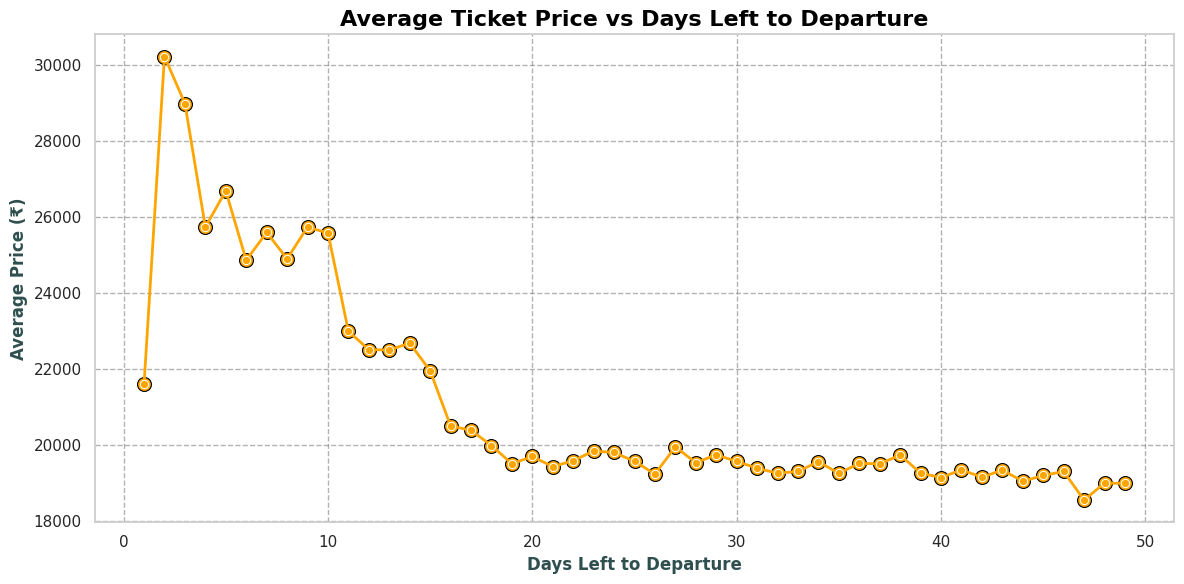

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean ticket prices for each days_left value
days_price = data.groupby('days_left')['price'].mean()

# Set the figure size
plt.figure(figsize=(12,6))

# Create a line plot with markers, using an orange color for the line
sns.lineplot(x=days_price.index, y=days_price.values, marker='o', color='orange', linewidth=2)

# Adding title with better formatting
plt.title("Average Ticket Price vs Days Left to Departure", fontsize=16, fontweight='bold', color='black')

# Adding axis labels with larger font size and bold weight
plt.xlabel("Days Left to Departure", fontsize=12, fontweight='bold', color='darkslategray')
plt.ylabel("Average Price (₹)", fontsize=12, fontweight='bold', color='darkslategray')

# Adding gridlines with a subtle style for better readability
plt.grid(True, linestyle='--', alpha=0.6, color='gray')

# Add data point markers for better visibility of values
sns.scatterplot(x=days_price.index, y=days_price.values, color='orange', s=100, marker='o', edgecolor='black')

# Use a background theme for the plot
sns.set_theme(style="whitegrid", palette="muted")

# Ensure everything fits neatly in the layout
plt.tight_layout()

# Show the plot
plt.show()


## Q.8. `How does the ticket price vary between Economy and Business class?`

In [ ]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
data['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [ ]:
# Filtering out the records with Economy class

x = data [ data['class'] == 'Economy' ]

x

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
206661,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697
206662,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709
206663,Vistara,UK-826,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640
206664,Vistara,UK-822,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640


In [ ]:
# Checking Mean Price for Economy class tickets

x.price.mean()

6572.342383362527

In [ ]:
# Filtering out the records with Business class

y = data [ data['class'] == 'Business' ]

y

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
206666,Air_India,AI-868,Delhi,Evening,zero,Evening,Mumbai,Business,2.00,1,25612
206667,Air_India,AI-624,Delhi,Evening,zero,Night,Mumbai,Business,2.25,1,25612
206668,Air_India,AI-531,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220
206669,Air_India,AI-839,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450
206670,Air_India,AI-544,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
# Checking Mean Price for Business class tickets

y.price.mean()

52540.08112357868

## Q.9. `What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class ?`

In [ ]:
data.head(1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953


In [ ]:
# applying filtering based on multiple conditions

new_data = data [(data['airline'] == 'Vistara') & (data['source_city'] == 'Delhi') & (data['destination_city'] == 'Hyderabad')
     & (data['class'] == 'Business')]

In [ ]:
new_data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
219123,Vistara,UK-871,Delhi,Night,zero,Night,Hyderabad,Business,2.33,1,30630
219124,Vistara,UK-879,Delhi,Evening,zero,Evening,Hyderabad,Business,2.25,1,38470
219129,Vistara,UK-955,Delhi,Evening,one,Night,Hyderabad,Business,27.17,1,63513
219130,Vistara,UK-955,Delhi,Evening,one,Afternoon,Hyderabad,Business,18.50,1,65764
219131,Vistara,UK-985,Delhi,Evening,one,Night,Hyderabad,Business,25.08,1,69113
...,...,...,...,...,...,...,...,...,...,...,...
221863,Vistara,UK-963,Delhi,Morning,one,Early_Morning,Hyderabad,Business,23.00,49,53937
221864,Vistara,UK-985,Delhi,Evening,one,Early_Morning,Hyderabad,Business,12.00,49,59537
221865,Vistara,UK-985,Delhi,Evening,one,Afternoon,Hyderabad,Business,16.42,49,59537
221866,Vistara,UK-955,Delhi,Evening,one,Early_Morning,Hyderabad,Business,14.08,49,61889


In [ ]:
# Checking the mean price

new_data['price'].mean()

47939.840361445786

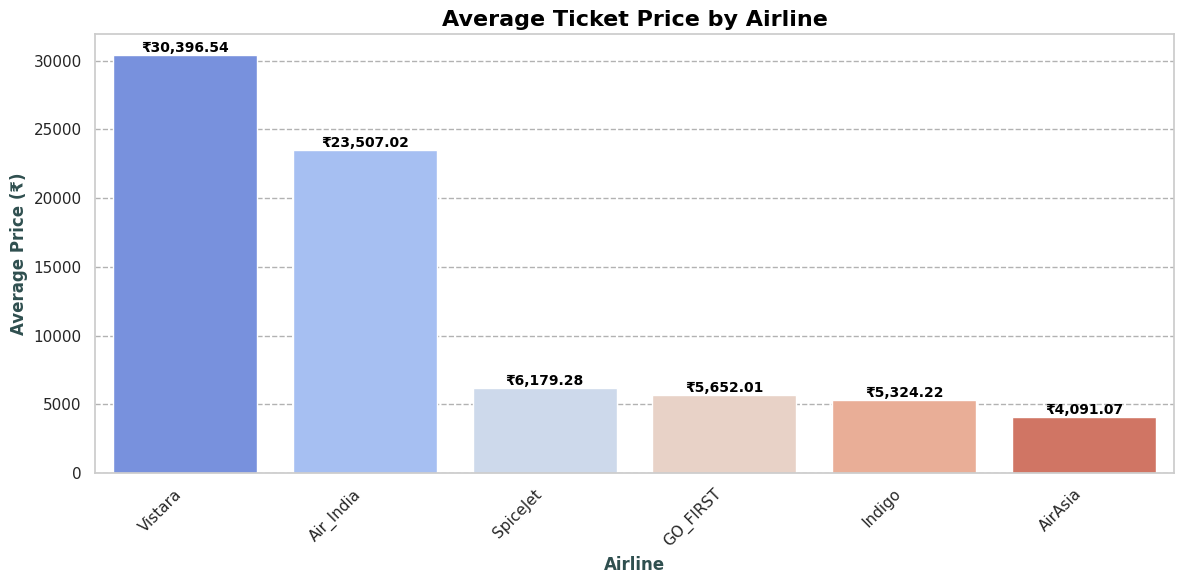

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average price by airline
airline_price = data.groupby('airline')['price'].mean().sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(12,6))

# Use seaborn to create a bar plot with a coolwarm color palette
sns.barplot(x=airline_price.index, y=airline_price.values, palette='coolwarm')

# Adding title with better formatting
plt.title("Average Ticket Price by Airline", fontsize=16, fontweight='bold', color='black')

# Adding axis labels with increased font size
plt.xlabel("Airline", fontsize=12, fontweight='bold', color='darkslategray')
plt.ylabel("Average Price (₹)", fontsize=12, fontweight='bold', color='darkslategray')

# Adding gridlines to only the y-axis with customized style
plt.grid(axis='y', linestyle='--', alpha=0.6, color='gray')

# Adding data labels above each bar for clarity
for i, value in enumerate(airline_price.values):
    plt.text(i, value + 0.05, f'₹{value:,.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Rotate x-axis labels to make them more readable
plt.xticks(rotation=45, ha='right', fontsize=11)

# Use a background theme for the plot
sns.set_theme(style="whitegrid", palette="muted")

# Ensure everything fits properly in the layout
plt.tight_layout()

# Show the plot
plt.show()


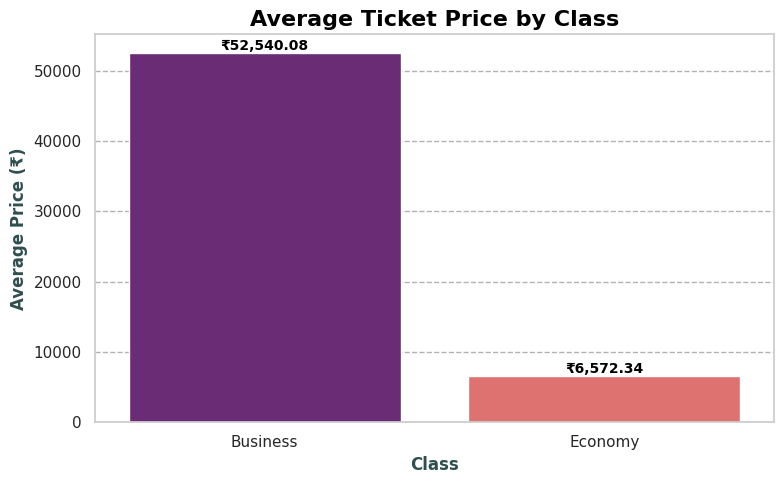

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average price by class
class_price = data.groupby('class')['price'].mean().sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(8,5))

# Use seaborn to create a bar plot with a magma color palette
sns.barplot(x=class_price.index, y=class_price.values, palette='magma')

# Adding title with better formatting
plt.title("Average Ticket Price by Class", fontsize=16, fontweight='bold', color='black')

# Adding axis labels with increased font size
plt.xlabel("Class", fontsize=12, fontweight='bold', color='darkslategray')
plt.ylabel("Average Price (₹)", fontsize=12, fontweight='bold', color='darkslategray')

# Adding gridlines to only the y-axis with customized style
plt.grid(axis='y', linestyle='--', alpha=0.6, color='gray')

# Adding data labels above each bar for clarity
for i, value in enumerate(class_price.values):
    plt.text(i, value + 0.05, f'₹{value:,.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Rotate x-axis labels to make them more readable
plt.xticks(rotation=0, fontsize=11)

# Use a background theme for the plot
sns.set_theme(style="whitegrid", palette="muted")

# Ensure everything fits properly in the layout
plt.tight_layout()

# Show the plot
plt.show()


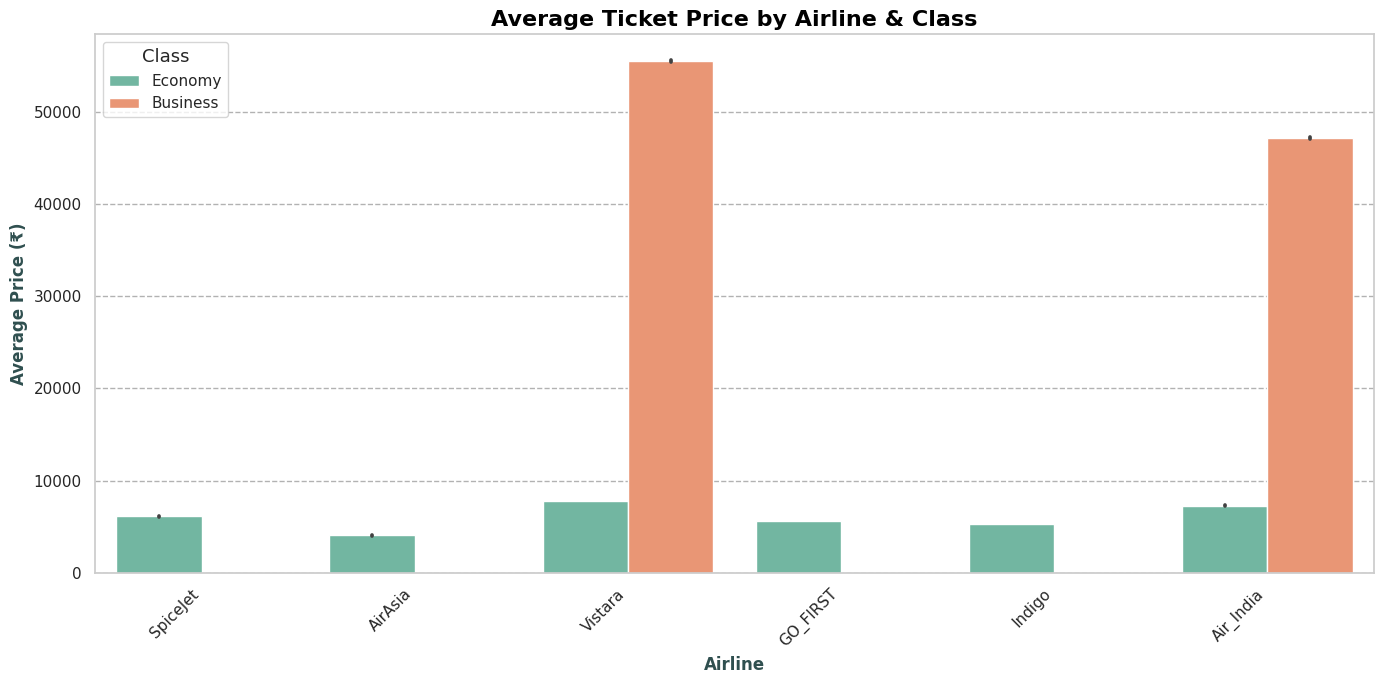

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14,7))

# Create a bar plot with hue for class, using Set2 color palette
sns.barplot(x='airline', y='price', hue='class', data=data, palette='Set2')

# Adding title with better formatting
plt.title("Average Ticket Price by Airline & Class", fontsize=16, fontweight='bold', color='black')

# Adding axis labels with increased font size and bold font weight
plt.xlabel("Airline", fontsize=12, fontweight='bold', color='darkslategray')
plt.ylabel("Average Price (₹)", fontsize=12, fontweight='bold', color='darkslategray')

# Adding gridlines to only the y-axis with a light style
plt.grid(axis='y', linestyle='--', alpha=0.6, color='gray')

# Rotate x-axis labels to make them more readable
plt.xticks(rotation=45, ha='right', fontsize=11)

# Adding a legend with more readable title
plt.legend(title='Class', title_fontsize='13', fontsize=11, loc='upper left')

# Use a background theme for the plot
sns.set_theme(style="whitegrid", palette="muted")

# Ensure everything fits properly in the layout
plt.tight_layout()

# Show the plot
plt.show()


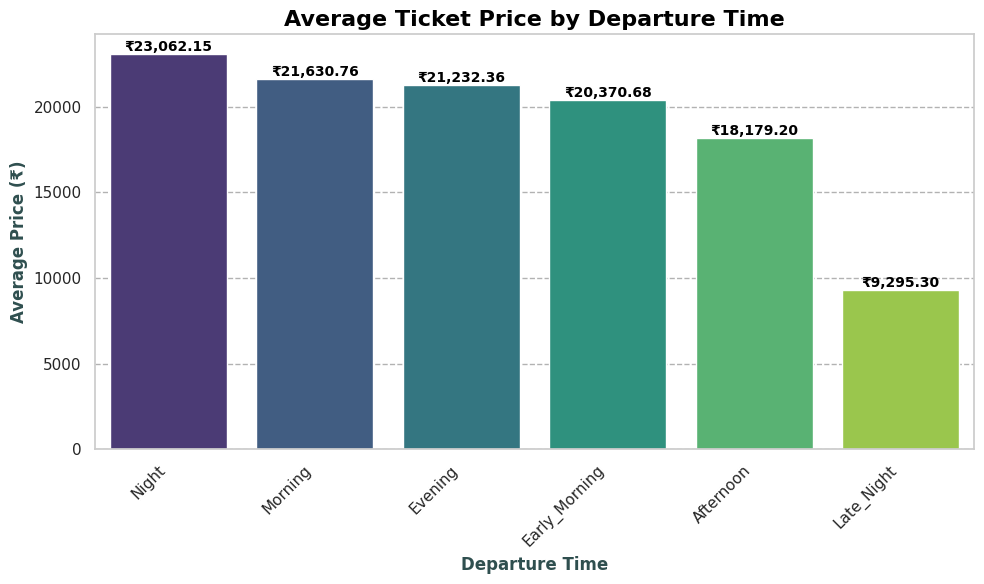

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean ticket prices for each departure time category
departure_price = data.groupby('departure_time')['price'].mean().sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(10,6))

# Create a bar plot with a 'viridis' color palette
sns.barplot(x=departure_price.index, y=departure_price.values, palette='viridis')

# Adding title with better formatting
plt.title("Average Ticket Price by Departure Time", fontsize=16, fontweight='bold', color='black')

# Adding axis labels with larger font size and bold weight
plt.xlabel("Departure Time", fontsize=12, fontweight='bold', color='darkslategray')
plt.ylabel("Average Price (₹)", fontsize=12, fontweight='bold', color='darkslategray')

# Adding data labels above each bar for clarity
for i, value in enumerate(departure_price.values):
    plt.text(i, value + 0.05, f'₹{value:,.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Rotate x-axis labels for better readability, especially with time-based data
plt.xticks(rotation=45, ha='right', fontsize=11)

# Add gridlines to only the y-axis, with a more subtle style
plt.grid(axis='y', linestyle='--', alpha=0.6, color='gray')

# Use a background theme for the plot
sns.set_theme(style="whitegrid", palette="muted")

# Ensure everything fits within the layout
plt.tight_layout()

# Show the plot
plt.show()


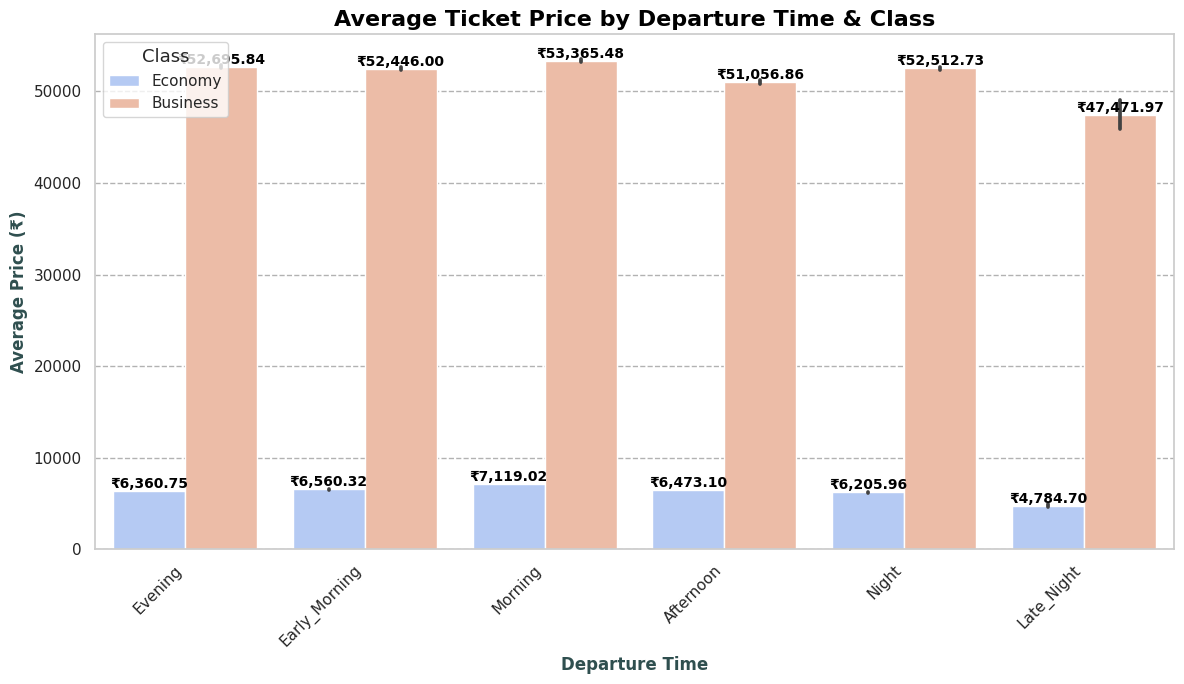

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12,7))

# Create a bar plot with hue for class, using a coolwarm palette
sns.barplot(x='departure_time', y='price', hue='class', data=data, palette='coolwarm')

# Adding title with better formatting
plt.title("Average Ticket Price by Departure Time & Class", fontsize=16, fontweight='bold', color='black')

# Adding axis labels with increased font size and bold font weight
plt.xlabel("Departure Time", fontsize=12, fontweight='bold', color='darkslategray')
plt.ylabel("Average Price (₹)", fontsize=12, fontweight='bold', color='darkslategray')

# Adding data labels above each bar for clarity
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.05, f'₹{p.get_height():,.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Rotate x-axis labels to make them more readable, especially with time-based data
plt.xticks(rotation=45, ha='right', fontsize=11)

# Add gridlines to only the y-axis with a more subtle style
plt.grid(axis='y', linestyle='--', alpha=0.6, color='gray')

# Adding a legend with improved title and size
plt.legend(title='Class', title_fontsize='13', fontsize=11, loc='upper left')

# Use a background theme for the plot
sns.set_theme(style="whitegrid", palette="muted")

# Ensure everything fits within the layout
plt.tight_layout()

# Show the plot
plt.show()


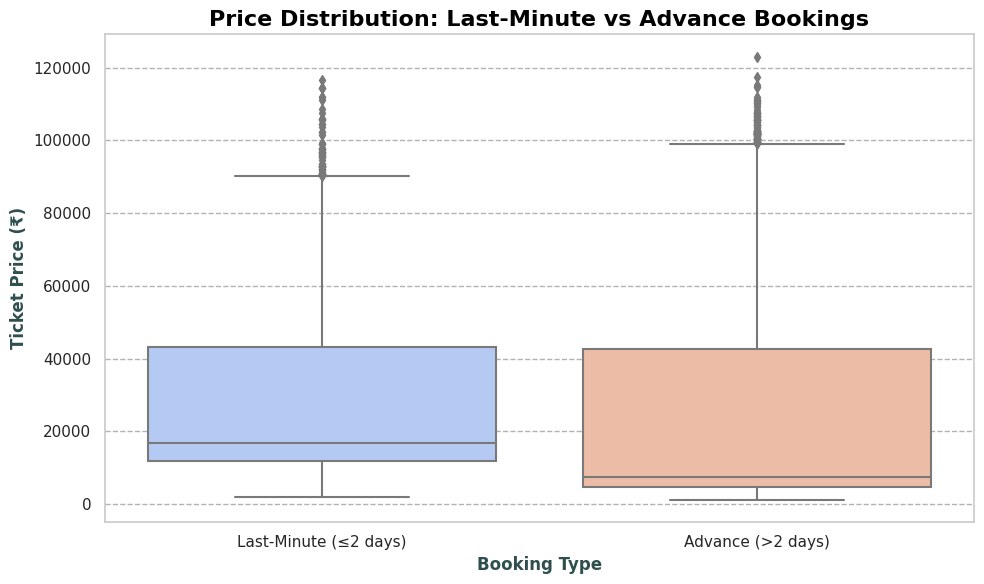

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Segment bookings into Last-Minute (<=2 days) and Advance (>2 days)
data['booking_type'] = data['days_left'].apply(lambda x: 'Last-Minute (≤2 days)' if x <= 2 else 'Advance (>2 days)')

# Set the figure size
plt.figure(figsize=(10,6))

# Create a boxplot with a coolwarm color palette
sns.boxplot(x='booking_type', y='price', data=data, palette='coolwarm')

# Adding title with better formatting
plt.title("Price Distribution: Last-Minute vs Advance Bookings", fontsize=16, fontweight='bold', color='black')

# Adding axis labels with larger font size and bold weight
plt.xlabel("Booking Type", fontsize=12, fontweight='bold', color='darkslategray')
plt.ylabel("Ticket Price (₹)", fontsize=12, fontweight='bold', color='darkslategray')

# Adding gridlines with a subtle style to make the chart cleaner
plt.grid(axis='y', linestyle='--', alpha=0.6, color='gray')

# Customize the x-axis labels to make them more readable
plt.xticks(rotation=0, fontsize=11)

# Use a background theme for the plot
sns.set_theme(style="whitegrid", palette="muted")

# Ensure everything fits properly within the layout
plt.tight_layout()

# Show the plot
plt.show()
